In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

    Player, manager, Pioneer/Executive and umpire are all eligible to be inducted into the HOF. In this article, player, instead of all the four posts was analyzed in order to find out what made a player a member of the Hall of Fame. The total number of the players elected as HOF member is 247, shown in output[5].
    Besides the fixed rules on who can be selected into the HOF, potential evaluation criteria, such as personal achievement, are concerned in this report. Actually, it will be a huge task if every aspects are expected to be taken into consideration as voting for the HOF itself is pretty complicated thing. To me, personal and team performance should be taken into consideration to decide whether a player is qualified to be chosen in the HOF. Based on the data downloaded from udacity website, three factors—player major league career time, awarded times, and times  playing in post-season match—were analyzed.
    HallOfFame.csv contains the information on the playerID of the players inducted into the HOF. Master.csv contains the information on player major league career time, including their debut time and final game time. AwardsSharePlayers.csv contains the basic information of players who were awarded titles over their career time. Those three csv files are the objects of study.

In [2]:
# read the HallOfFame.csv as Hall_Of_Fame
# read the Master.csv as Master
# read the AwardsSharePlayers.csv as Awards_Share_Players
Hall_Of_Fame=pd.read_csv(r'F:\udacity\DAND\project 2\big boss\baseball\baseballdatabank-master\HallOfFame.csv').fillna('')
Master=pd.read_csv(r'F:\udacity\DAND\project 2\big boss\baseball\baseballdatabank-master\Master.csv').fillna('')
Awards_Share_Players=pd.read_csv(r'F:\udacity\DAND\project 2\big boss\baseball\baseballdatabank-master\AwardsSharePlayers.csv').fillna('')
BattingPost=pd.read_csv(r'F:\udacity\DAND\project 2\big boss\baseball\baseballdatabank-master\BattingPost.csv').fillna('')

    Part I
    It is found that the Hall_Of_Fame dataframe contains not only the HOF players, but also those who are not. To get the targeted HOF players information, df.groupby() and df.get_group() are adopted as follows:

In [3]:
# group the Hall_Of_Fame by the keys of 'inducted' and 'category'
Hall_Of_Fame_inducted_players=Hall_Of_Fame.groupby(['inducted','category'])

In [4]:
# get a dataframe of players inducted into the hall of fame
target_playrs=Hall_Of_Fame_inducted_players.get_group(('Y','Player'))

In [5]:
# count the total number of HOF players
target_playrs['playerID'].count()

247

    The total number of HOF players is 247. To get their major league career time, df.Master is merged into df.target_playrs on 'playerID' as the debut and final game dates are in df.Master. 'inner' was chosen because HOF players are the study cases in this Dataframe.

In [6]:
# get the basic information dataframe of the players voted as a member of hall of fame
H_M=target_playrs.merge(Master, on='playerID', how='inner')

    To calculate the player major league career time, the original debut and finalgame date needs to be first of all transformed by function date_convert(), and then the career time can be obtained by df.apply() using the function days_caculation().
    For the missing values in debut and finalgame columns, function date_convert simply returns 'NaN' because it seems impossible for me to find all those missing information on tables downloaded or on the internet and the missing values account only a small proportion of the whole dataset. Again, those missing values are ignored in the function days_caculation using 'except TypeError: /n pass' as the 'NaN's will cause a typeError.

In [7]:
# get the major league career time(days between debut and finalGmae) of the target players(the players accepted in "Hall of Fmae")
from dateutil import parser
def date_convert(date):
    if date=='':
        return 'NaN'
    return parser.parse(date).date()
def days_caculation(date):
    try:
        return (date['finalGame']-date['debut']).days
    except TypeError:
        pass
debut_date=H_M['debut'].apply(date_convert)
final_date=H_M['finalGame'].apply(date_convert)
D_F=pd.concat([debut_date,final_date],axis=1)
number_of_days=D_F.apply(days_caculation,axis=1)

    Since I want to ignore all those missing dates rows as I have mentioned before(the dataset is fiarly large enough even without those missing values), df.dropna() is adopted below so that df.D_number_of_days can be described successfully.
    221 instead of 247 values are counted in df.number_of_days because there exists some NaN values in the df.number_of_days which is caused by the missing debut or finalgame date in the Master table. The mean of the 221 players major league career time is 6453.
    To make a comparison of the HOF players and the average major league career time, the process is exerted to the Master table(all players' information recorded).What should be mentioned is that the minimum career time of the ordinary players is -4, which is obvious a data record mistake, while it doesn't cause a noteworthy difference to the statistical analysis. The mean of ordinary players major league career time is 1762, which is far less than that of the HOF players. 

In [8]:
# get the players' major league career time, number_of_days, with NaN values removed.
D_number_of_days=number_of_days.dropna()

In [9]:
D_number_of_days.describe()

count      221.000000
mean      6453.420814
std       1507.008883
min         29.000000
25%       5603.000000
50%       6548.000000
75%       7450.000000
max      11836.000000
dtype: float64

In [10]:
# get the career period of all the players( players in the Master table)
M_debut_date=Master['debut'].apply(date_convert)
M_final_date=Master['finalGame'].apply(date_convert)
M_D_F=pd.concat([M_debut_date,M_final_date],axis=1)
M_number_of_days=M_D_F.apply(days_caculation,axis=1)

In [11]:
D_M_number_of_days=M_number_of_days.dropna()

In [12]:
# the average career days of all the players(except for those players without debut or finalGame day recorded in the Master table)
D_M_number_of_days.describe()

count    18653.000000
mean      1762.067228
std       1835.378564
min         -4.000000
25%        137.000000
50%       1165.000000
75%       2933.000000
max      12862.000000
dtype: float64

In [13]:
D_M_number_of_days[D_M_number_of_days == -4].index[0]

11360

In [14]:
# find the element with abnormal career time.
Master.loc[11360]

playerID               menzete01
birthYear                   1897
birthMonth                    11
birthDay                       4
birthCountry                 USA
birthState                    MO
birthCity              St. Louis
deathYear                   1969
deathMonth                    12
deathDay                      23
deathCountry                 USA
deathState                    MO
deathCity              St. Louis
nameFirst                    Ted
nameLast                   Menze
nameGiven       Theodore Charles
weight                       172
height                        69
bats                           R
throws                         R
debut                 1918-04-27
finalGame             1918-04-23
retroID                 menzt101
bbrefID                menzete01
Name: 11360, dtype: object

  As shown in Fig.1. The HOF players' median major league career time is remarkablely larger than that of the ordinary players. The HOF players career time distribution is more tight than that of the ordinary players, and few outliers are found in the HOF player plotting. Those obvious differences between the two data groups imply that the HOF players are distinctive from that of the average players.

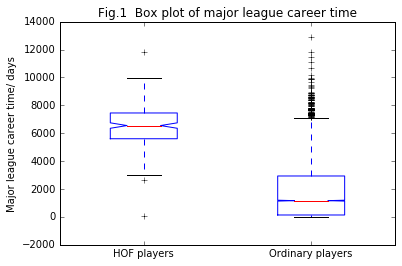

In [15]:
x=np.array([500])
plt.figure()
plt.boxplot(D_number_of_days,widths=400,notch=True,positions=x+500)
plt.boxplot(D_M_number_of_days,widths=400,notch=True,positions=x+1500)
plt.xlim(500,2500)
plt.xticks([1000,2000], ['HOF players', 'Ordinary players'])
plt.ylabel('Major league career time/ days')                  # y-axis label
plt.title('Fig.1  Box plot of major league career time')  # plot title                   
plt.show()

    To further investigate the case, the HOF players' mean career time, 6453 days, is chosen as an indicator. The amount of players who have a career time longer than 6453 days is counted, 304. It accounts about 0.016 of the total players with career time recorded in the Master table, and it indicates that the HOF average career time is significantly larger than the ordinary players.

In [16]:
# get a Series with career time(days) and its frequency in it
M_days_frequency=D_M_number_of_days.value_counts()

In [17]:
# convert pd.Series to pd.DataFrame
M_days_frequency_df=pd.DataFrame({'Days':M_days_frequency.index, 'Frequency':M_days_frequency.values})

In [18]:
# sort df.M_days_frequency_df by 'Days' in size order
S_M_days_frequency_df=M_days_frequency_df.sort_values(by='Days')

In [19]:
# Remove values less than 6453.420814 out of df.S_M_days_frequency_df 
M_S_M_days_frequency_df=S_M_days_frequency_df[S_M_days_frequency_df.Days > 6453]

In [20]:
# get the total number of players who have longer career time than HOF average career time.
above_HOF_mean=M_S_M_days_frequency_df.count()

In [21]:
# number of players who have longer career time than HOF average career time
above_HOF_mean.loc['Days']

304

In [22]:
# total number of players with career time in record
D_M_number_of_days.count()

18653

In [23]:
# percent of the players longer career time than HOF average in all the players
percent_above_HOF_mean=float(above_HOF_mean.loc['Days'])/D_M_number_of_days.count()

In [24]:
percent_above_HOF_mean

0.016297646491181043

    Part II
    For those baseball superstars, winning an award is definitely an important way to expand their influence. So it is conjectured that number of awards might be an important factor voting for a HOF player.
    To start the analysis, df.Awards_Share_Players should be first of all merged into pd.target_players, and obtain df.H_A with HOF players awards information in.

In [25]:
# get the players voted as a member of hall of fame dataframe with awards information 
H_A=target_playrs.merge(Awards_Share_Players, on='playerID', how='left')

In [26]:
H_A_groupby_playerID=H_A.groupby('playerID')

In [27]:
# get the average awarded times of the Hall of fame players
H_A_groupby_playerID.count()['awardID'].describe()

count    247.000000
mean       5.740891
std        5.058767
min        0.000000
25%        0.000000
50%        6.000000
75%        9.500000
max       21.000000
Name: awardID, dtype: float64

In [28]:
# get all players dataframe with awards information 
M_A=Master.merge(Awards_Share_Players, on='playerID', how='left')

In [29]:
M_A_groupby_playerID=M_A.groupby('playerID')

In [30]:
# get the average awarded times of all players
M_A_groupby_playerID.count()['awardID'].describe()

count    18846.000000
mean         0.360501
std          1.361775
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         23.000000
Name: awardID, dtype: float64

    To make a comparison, the statistical describe of the average players recorded in Master table is obtained similarly, which is shown in output[30]. It is found that the HOF players' mean awards is 5.74, and the average players' mean awards is 0.36. This result strongly implies that player's award number does have an effect on a player to be voted as a member of the HOF.
    To have a better understanding of the awards number difference between HOF players and the average players, the award number distribution of all players is plotted in Fig.1:

In [31]:
import collections 
import pylab as pl

    collections.counter is used to get a dict, Awards_counter, counting the number of every award times.

In [32]:
Awards_counter=collections.Counter(M_A_groupby_playerID.count()['awardID'].tolist())

In [33]:
Frequency=Awards_counter.values()
Award_number=Awards_counter.keys()

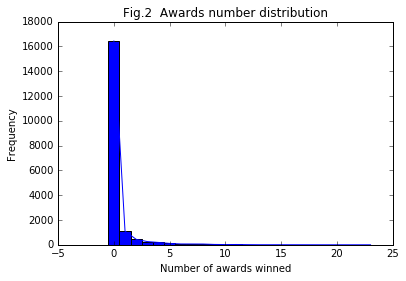

In [34]:
pl.plot(Award_number,Frequency)
plt.bar(Award_number,Frequency, width=1, align='center')
plt.title('Fig.2  Awards number distribution')
plt.xlabel('Number of awards winned')
plt.ylabel('Frequency')
pl.show()

    As is shown in Fig.2, it is easy to find that there are quite few players who might win 5 or more awards. Of all the 312 players who win more than 5 awards, 125 of them(or 40%) are inducted into the HOF. The reason why 5 is chosen here is that the HOF players mean awards is 5.7. It indicates that the number of awards a player win has significant effect on whether the players can be inducted as a member of the HOF.

In [35]:
five_awards_players_total=sum(M_A_groupby_playerID.count()['awardID']>5)

In [36]:
five_awards_players_HOF=sum(H_A_groupby_playerID.count()['awardID']>5)

In [37]:
print five_awards_players_total
print five_awards_players_HOF
float(five_awards_players_HOF)/five_awards_players_total

312
125


0.40064102564102566

    Part III
    Besides major league career time and award number, how many times a player played in post-season match is conjectured to be a reasonable factor to decide whether a player can be inducted into the HOF. Here we make a hypothesis that all the players who have taken a post-season match is recorded in the PostBattling table, and all the following analyses are based on this premise.
    The mean post-season matches a HOF player played in his career time is 3.37 as shown in output[42], and the mean post-season matches an ordinary  player played in his career time is 0.620 as shown in output[43]. This huge gap between the HOF players and the ordinary players indicates that post-season experiences have an influence on the HOF voting and players who participated more post-season matches are more likely to be inducted into the HOF.

In [38]:
# get a Series of the playerID frequency from the dataframe
BP_playerID_frequency=BattingPost['playerID'].value_counts()

In [39]:
# convert the BP_playerID_frequency Seires to a dataframe with ‘playerID’，'counts' as its columns
BP_playerID_frequency_df = BP_playerID_frequency.reset_index()
BP_playerID_frequency_df.columns=['playerID', 'counts']

In [40]:
# get the players voted as a member of hall of fame dataframe with Post season information 
H_P=target_playrs.merge(BP_playerID_frequency_df, on='playerID', how='left')
# get the normal players in Master table with Post season information 
M_P=Master.merge(BP_playerID_frequency_df, on='playerID', how='left')

    df.H_P and df.M_P contain Post season information of the HOF players and average players respectively, but for those who haven't participated post-season matches, the values in the two Dataframe are missing, while actually they should be counted as 0. Thus the missing data in H_P['counts'] and M_P['counts'] are replaced with 0 using the following codes.

In [41]:
H_P['counts'].fillna(0,inplace=True)
M_P['counts'].fillna(0,inplace=True)

In [42]:
H_P['counts'].describe()

count    247.000000
mean       3.372470
std        3.769655
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       23.000000
Name: counts, dtype: float64

In [43]:
M_P['counts'].describe()

count    18846.000000
mean         0.620291
std          1.742738
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: counts, dtype: float64

    To find out the influence of post-season experience on the HOF voting, the amount of HOF and average players with different numbers of awards are counted respectively. To make a better analysis, the possibility of players with different numbers of awards entering the HOF is signified by the ratio of the two numbers, ie, amount of HOF players and amount of average players at equal awards number. The result is shown in Fig.3. It is found that the possibility of entering the HOF is becoming larger and larger as the awards number increases, where the awards number 23 is an exceptional because the Sample size is too small. The Fig.2 trend indicates that players with more award titles are more likely to be inducted into the HOF.

In [44]:
H_P_T=H_P['counts'].value_counts()
M_P_T=M_P['counts'].value_counts()

    To sort the post-season match experience times in the right order, Series.H_P_T and Series.M_P_T are converted into df.H_P_T_df and df.M_P_T_df as shown below.

In [45]:
H_P_T_df=pd.DataFrame({'Times':H_P_T.index, 'H_Frequency':H_P_T.values})
M_P_T_df=pd.DataFrame({'Times':M_P_T.index, 'M_Frequency':M_P_T.values})

In [46]:
S_H_P_T_df=H_P_T_df.sort_values(by='Times')
S_M_P_T_df=M_P_T_df.sort_values(by='Times')

    df.S_M_P_T_df is merged into df.S_H_P_T_df on 'Times' as df.S_MH_P_T_df below so that only the cases in HOF players will be included in the analysis, which will make the analysis more clear. On the other hand, the resulted Dataframe S_MH_P_T_df makes the percentage calculation and ploting code more concise and simple.

In [47]:
S_MH_P_T_df=S_M_P_T_df.merge(S_H_P_T_df,on='Times',how='right')

In [48]:
S_MH_P_T_df['percentage']=S_MH_P_T_df.H_Frequency/S_MH_P_T_df.M_Frequency

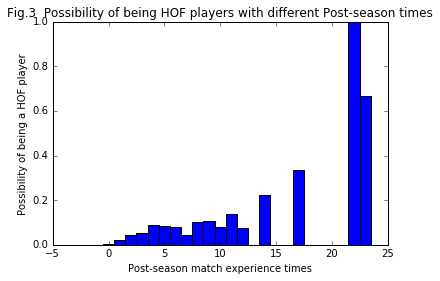

In [49]:
plt.bar(S_MH_P_T_df['Times'], S_MH_P_T_df['percentage'], width=1, align='center',label=None)
plt.title('Fig.3  Possibility of being HOF players with different Post-season times')
plt.xlabel('Post-season match experience times')
plt.ylabel('Possibility of being a HOF player')
pl.show()

In summary，all of the three factors—player major league career time, awarded times, and times  playing in post-season match— are believed to be reference indexes in HOF players voting process, but the analysis result doesn't show a causal relation between the analyzed factors and the inducting result. Besides, there are some other cons in the coding and analyzing process. 1) The datasets are filled with missing values, for example, the missing debut and finalgame dates of HOF players, we just ignore them. Though it simplifies the codes and may not change the result, it does make the dataset smaller. 2) Statistical calculations(means,percentages), instead of statistical testing  were done to make assumption and analysis in this report. On one hand, it makes the coding process more simple as the data distribution is quite complicated. On the other hand, it makes the analysis and explaining part a little bit tricky and vague.